In [1]:
import numpy as np
from glob import glob
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmasher as cms

from regions import EllipseSkyRegion, RectangleSkyRegion

from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

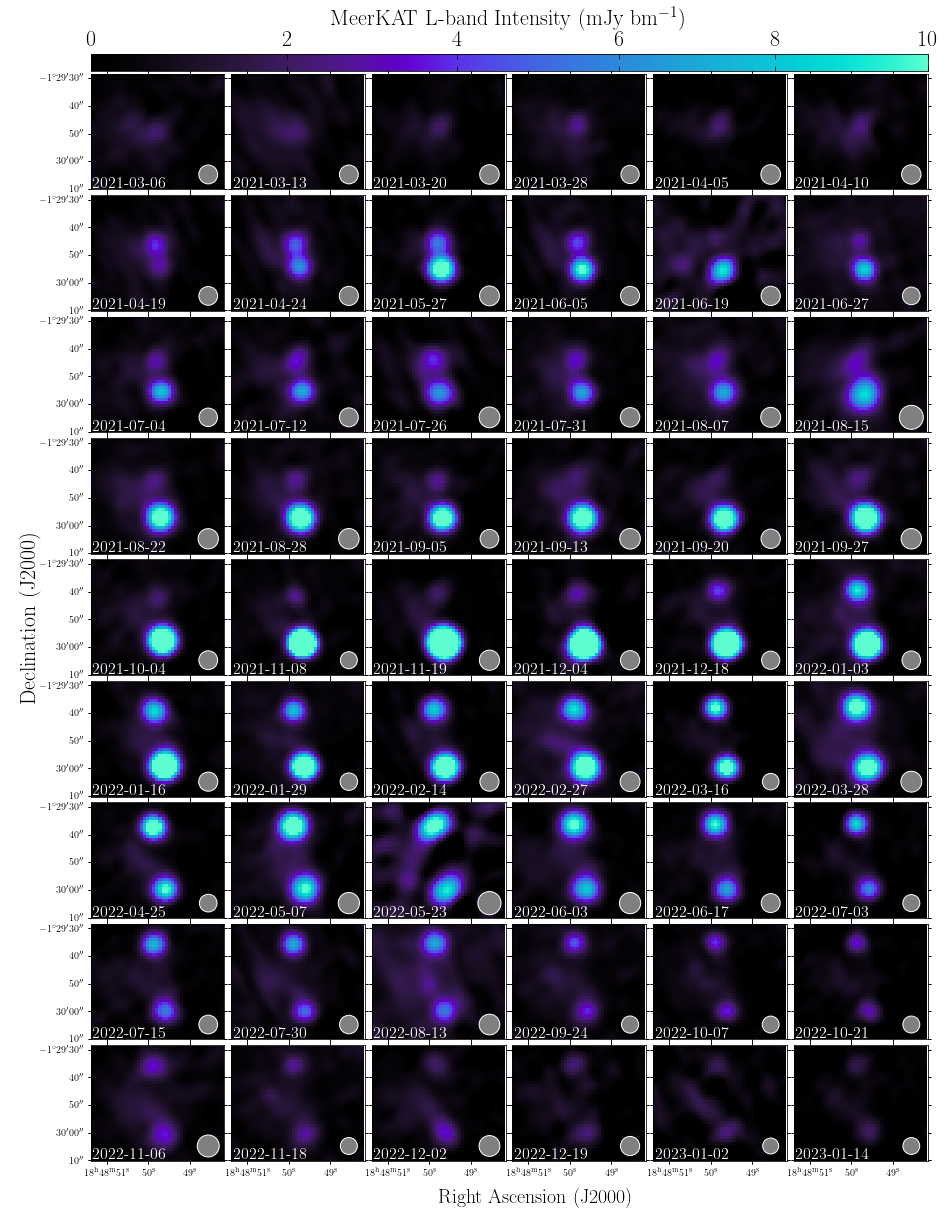

In [2]:
def add_panel(fig, nrows, ncols, row, col, bkg_fname):
    bkg_im  =  fits.open(bkg_fname)
    bkg_data = bkg_im[0].data[0][0]*1e3
    bkg_wcs = WCS(bkg_im[0].header, naxis=2)
    bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)
        
    ax = plt.subplot2grid([nrows, ncols], [row, col], fig=fig, projection=bkg_cut.wcs)
    
    cmap = cms.cosmic
    cmap.set_bad('black')
    cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=10.0)
    
    ax_bkimg = ax.imshow(bkg_cut.data,
                         cmap = cmap,
                         norm = cmap_norm,
                         aspect = 'equal',
                         origin = 'lower', 
                         interpolation = 'none',
                         rasterized = True, transform=ax.get_transform(bkg_cut.wcs))
        
    meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-18*u.arcsec,-15*u.arcsec),
                                    bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
    meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
    meerkat_beam_pix_reg.visual['color'] = 'w'
    meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
    meerkat_beam_pix_reg.visual['fill'] = True
    meerkat_beam_pix_reg.visual['linewidth'] = 1.0
    meerkat_beam_pix_reg.plot(ax=ax)
    if row == 4 and col == 0:
        ax.set_ylabel(r"Declination (J2000)", size=22,labelpad=0.4)
    else:
        ax.set_ylabel(r" ", size=22)

    if row == 8 and col == 2:
        ax.set_xlabel(r"Right Ascension (J2000)", size=20,ha='left')
    else:
        ax.set_xlabel(r" ", size=20)
    axra = ax.coords[0]
    axdec = ax.coords[1]
    if row != 8:
        axra.set_ticklabel(size=0)
    if col != 0:
        axdec.set_ticklabel(size=0)

    ax.text(0, 0, bkg_im[0].header['DATE-OBS'][:10],fontsize=label_fsize-10,color='w')
    
    return fig, ax_bkimg
    

img_list = glob('/home/arash/cira-data/glimpse-c01/meerkat/images/img_j1848_MJD59*')[:55]
img_list.sort()
img_list = img_list[:-1]    # for consistency, only including images where we have done localization analysis
fig = plt.figure(figsize=(15,20))
label_fsize = 26

center = SkyCoord('18h48m49.75s', '-1d29m49.8s', frame='icrs')
box_bkg = [0.7*u.arcmin,0.8*u.arcmin]
box_contour1 = [0.6*u.arcmin,0.6*3.5/3*u.arcmin]

for meer_n, meer_img in enumerate(img_list):
    _, ax_bkimg = add_panel(fig,9,6,int(meer_n/6),meer_n%6,meer_img);

cbar = fig.colorbar(ax_bkimg, ax=fig.axes, orientation='horizontal', anchor=(0,7.45),aspect=50)
cbar.ax.set_title('MeerKAT L-band Intensity (mJy bm$^{-1}$)',fontsize=label_fsize-4,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize-4)

fig.subplots_adjust(hspace=0.05,wspace=0.05)